In [1]:
import tensorflow as tf
import numpy as np
import math

In [2]:
print(tf.__version__)

1.15.5


In [ ]:
# if version 2+, update code as in example:
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/summary/FileWriter

In [6]:
log_dir = './logs/sin_cos_sequential_a'
"""
1. write a sinus value to tensorboard sequentially
2. write a cosinus value to tensorboard sequentially
tf version: 1.15.5
"""

# create a writer
writer = tf.summary.FileWriter(log_dir)

# create a graph
with tf.name_scope('sin_cos_sequential'):
    x = tf.placeholder(tf.float32, name='x')
    sin_x = tf.sin(x, name='sin_x')
    cos_x = tf.cos(x, name='cos_x')

# create a session
with tf.Session() as sess:
    # create a summary writer
    writer = tf.summary.FileWriter(log_dir, sess.graph)

    # create a summary
    sin_x_summary = tf.summary.scalar('sin_x', sin_x)
    cos_x_summary = tf.summary.scalar('cos_x', cos_x)

    # run the session
    for i in range(100):
        sin_x_value, cos_x_value, summary = sess.run([sin_x, cos_x, sin_x_summary], feed_dict={x: i})
        writer.add_summary(summary, i)
        summary = sess.run(cos_x_summary, feed_dict={x: i})
        writer.add_summary(summary, i)

# close the writer
writer.close()
tf.reset_default_graph()

In [7]:
log_dir = './logs/sin_cos_sequential_b'
"""
1. write a sinus value to tensorboard sequentially
2. write a cosinus value to tensorboard sequentially
tf version: 1.15.5
"""

# create a writer
writer = tf.summary.FileWriter(log_dir)

# create a graph
with tf.name_scope('sin_cos_sequential'):
    x = tf.placeholder(tf.float32, name='x')
    sin_x = tf.sin(x, name='sin_x')
    cos_x = tf.cos(x, name='cos_x')

# create a session
with tf.Session() as sess:
    # create a summary writer
    writer = tf.summary.FileWriter(log_dir, sess.graph)

    # create a summary
    sin_x_summary = tf.summary.scalar('sin_x', sin_x/2)
    cos_x_summary = tf.summary.scalar('cos_x', cos_x/2)

    # run the session
    for i in range(100):
        sin_x_value, cos_x_value, summary = sess.run([sin_x, cos_x, sin_x_summary], feed_dict={x: i})
        writer.add_summary(summary, i)
        summary = sess.run(cos_x_summary, feed_dict={x: i})
        writer.add_summary(summary, i)

# close the writer
writer.close()
tf.reset_default_graph()

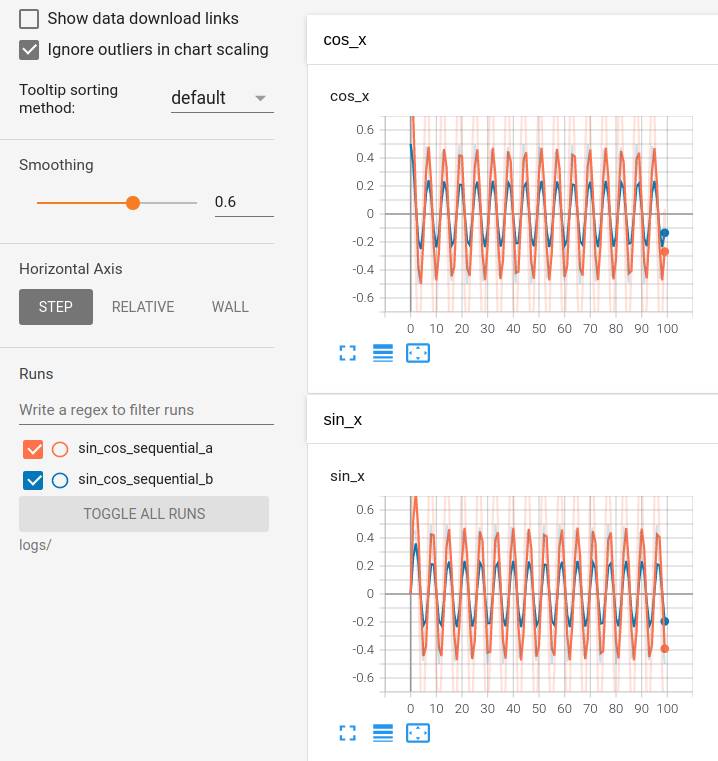

In [3]:
data_size = int(np.random.rand()*100+100)
data_size

143

In [4]:
log_dir = 'logs/growth_0'
histogram_name = 'noname'

dist = tf.compat.v1.placeholder(tf.float32, [1])
tf.compat.v1.summary.histogram(name=histogram_name, values=dist)
writer = tf.compat.v1.summary.FileWriter(log_dir)
summaries = tf.compat.v1.summary.merge_all()

sess = tf.compat.v1.Session()
for i in range(data_size):
    value = i/2
    summary = sess.run(summaries, feed_dict={dist: [value]})
    writer.add_summary(summary, i)
    writer.flush()
writer.close()
sess.close()
tf.reset_default_graph()

2022-05-14 11:02:40.854912: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-05-14 11:02:40.878909: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3999980000 Hz
2022-05-14 11:02:40.879303: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55bdcb2e2fc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-14 11:02:40.879318: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [5]:
log_dir = 'logs/growth_1'
histogram_name = 'noname'

dist = tf.compat.v1.placeholder(tf.float32, [1])
tf.compat.v1.summary.histogram(name=histogram_name, values=dist)
writer = tf.compat.v1.summary.FileWriter(log_dir)
summaries = tf.compat.v1.summary.merge_all()

sess = tf.compat.v1.Session()

for i in range(data_size):
    value = np.float(math.sin(i)+i/1.5)
    summary = sess.run(summaries, feed_dict={dist: [value]})
    writer.add_summary(summary, i)
    writer.flush()
writer.close()
sess.close()
tf.reset_default_graph()

In [ ]:
log_dir = 'logs/test'
histogram_name = 'noname'

In [ ]:
dist = tf.compat.v1.placeholder(tf.float32, [100])
tf.compat.v1.summary.histogram(name=histogram_name, values=dist)
writer = tf.compat.v1.summary.FileWriter(log_dir)
summaries = tf.compat.v1.summary.merge_all()

In [ ]:
sess = tf.compat.v1.Session()
for step in range(100):
  mean_moving_normal = np.random.normal(loc=step, scale=1, size=[100])
  summ = sess.run(summaries, feed_dict={dist: mean_moving_normal})
  writer.add_summary(summ, global_step=step)

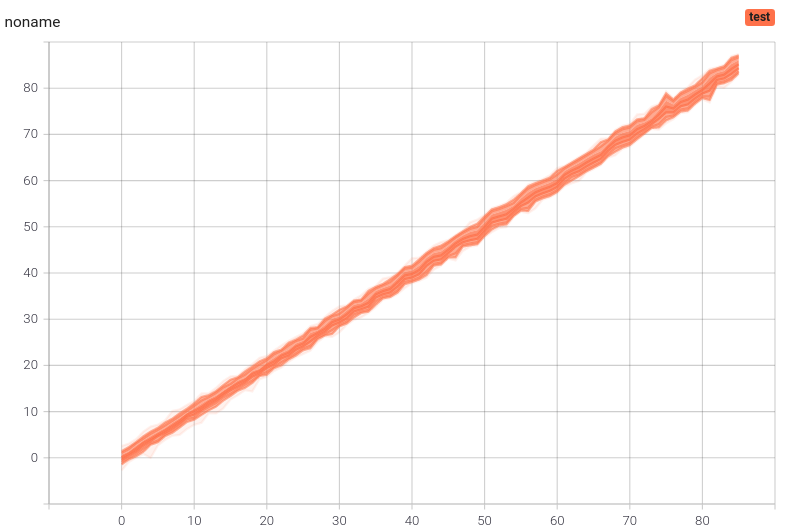

In [ ]:
"""
write a sinus value to tensorboard
"""

import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt

# create a writer
writer = tf.summary.FileWriter('./graphs/sinus_writer')

# create a graph
X = np.arange(0, 10, 0.1)
Y = np.sin(X)

#plt.plot(X, Y)
#plt.xlabel('time')
#plt.ylabel('value')
#plt.title('Sinus')
#plt.show()

# create a placeholder
X_ = tf.placeholder(tf.float32, shape=X.shape, name='X')
Y_ = tf.placeholder(tf.float32, shape=Y.shape, name='Y')

# create a summary
summ = tf.summary.scalar('sinus', tf.reduce_sum(Y_))

# create a session
with tf.Session() as sess:
    # run the summary
    summ_str = sess.run(summ, feed_dict={X_: X, Y_: Y})
    # add the summary to the writer
    writer.add_summary(summ_str)
    # close the writer
    writer.close()

In [ ]:
"""
write a sinus value to tensorboard sequentially
"""

import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt

# create a writer
writer = tf.summary.FileWriter('./graphs/sinus_writer_2', tf.get_default_graph())

# create a placeholder
X = tf.compat.v1.placeholder(tf.float32, name='X')

# create a variable
Y = tf.compat.v1.placeholder(X, name='Y')

# initialize the variable
init = tf.global_variables_initializer()

# create a session
with tf.Session() as sess:
    # initialize the variable
    sess.run(init)

    # create a sinus wave
    for i in range(100):
        sess.run(Y.assign(tf.sin(X + i / 10.)), {X: np.arange(0, 100, 0.1)})
        summary = tf.summary.scalar('sinus', Y)
        writer.add_summary(sess.run(summary), i)

# close the writer
writer.close()

In [ ]:
"""
write a sinus value to tensorboard sequentially
tf version: 1.15.5
"""

import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt

# create a writer
writer = tf.summary.FileWriter('./logs/sinus')

# create a graph
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

# create a summary
tf.summary.scalar('sinus', y)

# merge all summaries
merged = tf.summary.merge_all()

# create a session
with tf.Session() as sess:
    # initialize all variables
    sess.run(tf.global_variables_initializer())

    # create a loop
    for i in range(1000):
        # create a sinus value
        x_value = i * 0.1
        y_value = np.sin(x_value)

        # create a summary
        summary = sess.run(merged, feed_dict={x: x_value, y: y_value})

        # add summary to writer
        writer.add_summary(summary, i)

    # close writer
    writer.close()

In [ ]:
# create a writer
writer = tf.summary.FileWriter('./logs/cosinus')

# create a graph
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

# create a summary
tf.summary.scalar('cosinus', y)

# merge all summaries
merged = tf.summary.merge_all()

# create a session
with tf.Session() as sess:
    # initialize all variables
    sess.run(tf.global_variables_initializer())

    # create a loop
    for i in range(1000):
        # create a sinus value
        x_value = i * 0.1
        y_value = np.cos(x_value)

        # create a summary
        summary = sess.run(merged, feed_dict={x: x_value, y: y_value})

        # add summary to writer
        writer.add_summary(summary, i)

    # close writer
    writer.close()